In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Binary Classification

So far, you've only created regression models. That is, you created models that produced floating-point predictions, such as, "houses in this neighborhood costs N thousand dollars." In this Colab, you'll create and evaluate a binary [classification model](https://developers.google.com/machine-learning/glossary/#classification_model).  That is, you'll create a model that answers a binary question. In this exercise, the binary question will be, "Are houses in this neighborhood above a certain price?"

# 二元分类

到目前为止，您只创建了回归模型。也就是说，您创建了生成浮点预测的模型，例如，“此社区的房屋成本为 N 千美元”。在此 Colab 中，您将创建并评估二进制 [分类模型]（https://developers.google.com/machine 学习/词汇表/#classification_model）。 也就是说，您将创建一个回答二进制问题的模型。在本练习中，二元问题将是，“这个社区的房屋是否高于某个价格？



## Learning Objectives:

After doing this Colab, you'll know how to:

  * Convert a regression question into a classification question.
  * Modify the classification threshold and determine how that modification influences the model.
  * Experiment with different classification metrics to determine your model's effectiveness.

## 学习目标：

完成此 Colab 操作后，您将了解如何：

* 将回归问题转换为分类问题。
  * 修改分类阈值并确定该修改如何影响模型。
  * 尝试不同的分类指标来确定模型的有效性。

## The Dataset
  
Like several of the previous Colabs, this Colab uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Call the import statements

The following code imports the necessary modules.

## 调用导入语句

以下代码导入必要的模块。

In [1]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


## Load the datasets from the internet

The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set

In [4]:
train_df = pd.read_csv("california_housing_train.csv")
test_df = pd.read_csv("california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8545,-118.5,34.0,32.0,6365.0,1784.0,2767.0,1698.0,3.6,383300.0
15521,-122.3,39.1,10.0,266.0,62.0,154.0,49.0,2.2,75000.0
11845,-121.3,38.6,22.0,3273.0,480.0,1151.0,463.0,8.1,380000.0
9826,-119.7,34.4,52.0,302.0,112.0,392.0,114.0,2.6,258300.0
7281,-118.3,34.0,52.0,2194.0,504.0,997.0,438.0,2.7,259400.0


Unlike some of the previous Colabs, the preceding code cell did not scale the label (`median_house_value`).  The following section ("Normalize values") provides an alternative approach.

与之前的一些 Colabs 不同，前面的代码单元没有缩放标签（“median_house_value”）。 下一节（“规范化值”）提供了另一种方法。

## Normalize values

When creating a model with multiple features, the values of each feature should cover roughly the same range.  For example, if one feature's range spans 500 to 100,000 and another feature's range spans 2 to 12, then the model will be difficult or impossible to train. Therefore, you should 
[normalize](https://developers.google.com/machine-learning/glossary/#normalization) features in a multi-feature model. 

The following code cell normalizes datasets by converting each raw value (including the label) to its Z-score. A **Z-score** is the number of standard deviations from the mean for a particular raw value. For example, consider a feature having the following characteristics:

  * The mean is 60.
  * The standard deviation is 10.

The raw value 75 would have a Z-score of +1.5:

```
  Z-score = (75 - 60) / 10 = +1.5
```

The raw value 38 would have a Z-score of -2.2:

```
  Z-score = (38 - 60) / 10 = -2.2
```

## 规范化值

创建具有多个特征的模型时，每个特征的值应覆盖大致相同的范围。 例如，如果一个要素的范围跨越 500 到 100，000，而另一个要素的范围跨越 2 到 12，则模型将难以或不可能训练。因此，您应该
[规范化]（https://developers.google.com/machine-learning/glossary/#normalization） 多特征模型中的特征。

以下代码单元通过将每个原始值（包括标签）转换为其 Z 得分来规范化数据集。**Z 得分** 是特定原始值与平均值的标准偏差数。例如，考虑具有以下特征的功能：

* 平均值为 60。
  * 标准偏差为 10。

原始值 75 的 Z 得分为 +1.5：

```
  Z 得分 = （75 - 60） / 10 = +1.5
```

原始值 38 的 Z 得分为 -2.2：

```
  Z 得分 = （38 - 60） / 10 = -2.2
```

In [5]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8545,0.5,-0.7,0.3,1.7,3.0,1.2,3.1,-0.1,1.5
15521,-1.4,1.6,-1.5,-1.1,-1.1,-1.1,-1.2,-0.9,-1.1
11845,-0.9,1.4,-0.5,0.3,-0.1,-0.2,-0.1,2.2,1.5
9826,-0.1,-0.6,1.9,-1.1,-1.0,-0.9,-1.0,-0.7,0.4
7281,0.6,-0.7,1.9,-0.2,-0.1,-0.4,-0.2,-0.6,0.4


In [6]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

## Task 1: Create a binary label

In classification problems, the label for every example must be either 0 or 1. Unfortunately, the natural label in the California Housing Dataset, `median_house_value`, contains floating-point values like 80,100 or 85,700 rather than 0s and 1s, while the normalized version of `median_house_values` contains floating-point values primarily between -3 and +3.

Your task is to create a new column named `median_house_value_is_high` in both the training set and the test set . If the `median_house_value` is higher than a certain arbitrary value (defined by `threshold`), then set `median_house_value_is_high` to 1. Otherwise, set `median_house_value_is_high` to 0. 

**Hint:** The cells in the `median_house_value_is_high` column must each hold `1` and `0`, not `True` and `False`. To convert `True` and `False` to  `1` and `0`, call the pandas DataFrame function `astype(float)`. 

## 任务 1：创建二分类标签

在分类问题中，每个示例的标签必须为 0 或 1。遗憾的是，加州住房数据集中的自然标签“median_house_value”包含浮点值，如 80，100 或 85，700，而不是 0 和 1，而规范化版本的“median_house_values”包含主要介于 -3 和 +3 之间的浮点值。

您的任务是在训练集和测试集中创建一个名为“median_house_value_is_high”的新列。如果“median_house_value”高于某个任意值（由“阈值”定义），则将“median_house_value_is_high”设置为 1。否则，请将“median_house_value_is_high”设置为 0。

**提示：** “median_house_value_is_high”列中的单元格必须各自包含“1”和“0”，而不是“真”和“假”。要将“真”和“假”转换为“1”和“0”，请将熊猫数据帧函数称为“astype（浮点）”。

In [7]:
threshold = 265000 # This is the 75th percentile for median house values.
train_df_norm["median_house_value_is_high"] = ? Your code here
test_df_norm["median_house_value_is_high"] = ? Your code here

# Print out a few example cells from the beginning and 
# middle of the training set, just to make sure that
# your code created only 0s and 1s in the newly created
# median_house_value_is_high column
train_df_norm["median_house_value_is_high"].head(8000)

SyntaxError: invalid syntax (1111972909.py, line 2)

In [8]:
#@title Double-click for possible solutions.

# We arbitrarily set the threshold to 265,000, which is 
# the 75th percentile for median house values.  Every neighborhood
# with a median house price above 265,000 will be labeled 1, 
# and all other neighborhoods will be labeled 0.
threshold = 265000
train_df_norm["median_house_value_is_high"] = (train_df["median_house_value"] > threshold).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df["median_house_value"] > threshold).astype(float) 
train_df_norm["median_house_value_is_high"].head(8000)


# Alternatively, instead of picking the threshold
# based on raw house values, you can work with Z-scores.
# For example, the following possible solution uses a Z-score
# of +1.0 as the threshold, meaning that no more
# than 16% of the values in median_house_value_is_high
# will be labeled 1.

# threshold_in_Z = 1.0 
# train_df_norm["median_house_value_is_high"] = (train_df_norm["median_house_value"] > threshold_in_Z).astype(float)
# test_df_norm["median_house_value_is_high"] = (test_df_norm["median_house_value"] > threshold_in_Z).astype(float) 


8545    1.0
15521   0.0
11845   1.0
9826    0.0
7281    0.0
         ..
4560    0.0
336     0.0
14424   1.0
1166    0.0
7665    1.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

## Represent features in feature columns

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in `feature_layer`) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model. 

## 在功能列中表示功能

此代码单元指定最终将基于哪些特征来训练模型，以及如何表示其中每个特征。转换（在“feature_layer”中收集）实际上不会应用，直到您将DataFrame传递给它，这将在我们训练模型时发生。

In [9]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Create a numerical feature column to represent total_rooms.
tr = tf.feature_column.numeric_column("total_rooms")
feature_columns.append(tr)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(train_df_norm))

<tf.Tensor: shape=(17000, 2), dtype=float32, numpy=
array([[-0.12497827,  1.7070761 ],
       [-0.85610276, -1.0906982 ],
       [ 2.1834803 ,  0.28869307],
       ...,
       [ 2.158063  , -0.7264692 ],
       [-0.8181604 , -0.01590149],
       [-0.96746683, -0.8205082 ]], dtype=float32)>

## Define functions that build and train a model

The following code cell defines two functions:

  * `create_model(my_learning_rate, feature_layer, my_metrics)`, which defines the model's
    topography.
  * `train_model(model, dataset, epochs, label_name, batch_size, shuffle)`, uses input features and labels to train the model.

Prior exercises used [ReLU](https://developers.google.com/machine-learning/glossary#ReLU) as the [activation function](https://developers.google.com/machine-learning/glossary#activation_function). By contrast, this exercise uses [sigmoid](https://developers.google.com/machine-learning/glossary#sigmoid_function) as the activation function. 

## 定义用于构建和训练模型的函数

下面的代码单元定义了两个函数：

* “create_model（my_learning_rate、feature_layer、my_metrics）”，它定义了模型的
    地形。
  * “train_model（模型、数据集、纪元、label_name、batch_size、随机播放）”，使用输入特征和标签来训练模型。

之前的练习使用[ReLU]（https://developers.google.com/machine 学习/词汇表#ReLU）作为[激活函数]（https://developers.google.com/machine 学习/词汇表#activation_function）。相比之下，本练习使用 [sigmoid]（https://developers.google.com/machine 学习/词汇表 #sigmoid_function） 作为激活函数。

In [27]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Funnel the regression value through a sigmoid function.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features. cxzdasqewewq774874
  features = {name:np.array(value) for name, value in dataset.items()}
  print(features)
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)
  print(hist)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


## Define a plotting function

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) function plots one or more curves, showing how various classification metrics change with each epoch.

In [28]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


## Invoke the creating, training, and plotting functions

The following code cell calls specify the hyperparameters, and then invokes the 
functions to create and train the model, and then to plot the results.

## 调用创建、训练和绘图函数

下面的代码单元格调用指定超参数，然后调用
函数来创建和训练模型，然后绘制结果。

{'longitude': array([ 0.52968583, -1.38038008, -0.88665547, ...,  0.579557  ,
        0.7241834 , -0.84177141]), 'latitude': array([-0.7463599 ,  1.62574772,  1.38713334, ..., -0.81654059,
       -0.73232376,  1.09705312]), 'housing_median_age': array([ 0.2709672 , -1.47687662, -0.52350726, ...,  0.50930954,
       -0.84129705,  0.98599422]), 'total_rooms': array([ 1.70707612, -1.09069823,  0.28869306, ..., -0.7264692 ,
       -0.01590149, -0.82050818]), 'total_bedrooms': array([ 2.95276583, -1.13264874, -0.14095113, ..., -0.82659852,
        0.43081711, -0.83134349]), 'population': array([ 1.16515452, -1.11126946, -0.24269131, ..., -0.85862386,
        0.68948383, -0.62165971]), 'households': array([ 3.11238802, -1.17606614, -0.09940148, ..., -0.79377217,
        0.52475194, -0.76776577]), 'median_income': array([-0.12497827, -0.85610278,  2.18348016, ...,  2.15806296,
       -0.8181604 , -0.96746681]), 'median_house_value': array([ 1.5174459 , -1.14068476,  1.48899364, ...,  2.523629

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


170/170 [==============================] - 0s 855us/step - loss: 1.3037 - accuracy: 0.2270
Epoch 2/20
170/170 [==============================] - 0s 838us/step - loss: 1.1556 - accuracy: 0.2359
Epoch 3/20
170/170 [==============================] - 0s 797us/step - loss: 1.0202 - accuracy: 0.2490
Epoch 4/20
170/170 [==============================] - 0s 775us/step - loss: 0.9021 - accuracy: 0.2730
Epoch 5/20
170/170 [==============================] - 0s 747us/step - loss: 0.8005 - accuracy: 0.3218
Epoch 6/20
170/170 [==============================] - 0s 776us/step - loss: 0.7166 - accuracy: 0.4348
Epoch 7/20
170/170 [==============================] - 0s 770us/step - loss: 0.6501 - accuracy: 0.6653
Epoch 8/20
170/170 [==============================] - 0s 767us/step - loss: 0.5964 - accuracy: 0.7460
Epoch 9/20
170/170 [==============================] - 0s 770us/step - loss: 0.5542 - accuracy: 0.7445
Epoch 10/20
170/170 [==============================] - 0s 785us/step - loss: 0.5187 - accurac

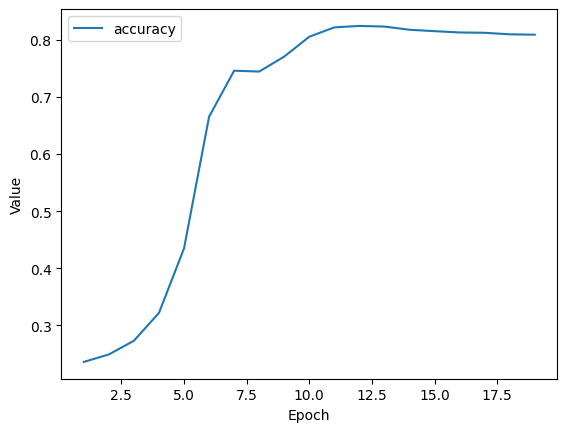

In [29]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

Accuracy should gradually improve during training (until it can 
improve no more).

在训练期间，准确性应逐渐提高（直到它能够
不再改善）。

## Evaluate the model against the test set

At the end of model training, you ended up with a certain accuracy against the *training set*. Invoke the following code cell to determine your model's accuracy against the *test set*.

## 根据测试集评估模型

在模型训练结束时，您最终对*训练集*具有一定的准确性。调用以下代码单元以确定模型相对于 *test 集* 的准确性。

In [13]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

30/30 [==============================] - 0s 907us/step - loss: 0.4069 - accuracy: 0.8013


[0.4068529009819031, 0.8013333082199097]

## Task 2: How accurate is your model really?

Is your model valuable?

## 任务 2：你的模型到底有多准确？

您的模型有价值吗？

In [14]:
#@title Double-click for a possible answer to Task 2.

# A perfect model would make 100% accurate predictions.
# Our model makes 80% accurate predictions. 80% sounds
# good, but note that a model that always guesses 
# "median_house_value_is_high is False" would be 75% 
# accurate. 

#@title 双击可获得任务 2 的可能答案。

# 一个完美的模型可以做出100%准确的预测。
# 我们的模型做出 80% 的准确预测。80% 声音
# 不错，但请注意，模型总是会猜测
# “median_house_value_is_high是假的”将是75%
# 准确。

## Task 3: Add precision and recall as metrics

Relying solely on accuracy, particularly for a class-imbalanced data set (like ours), can be a poor way to judge a classification model.  Modify the code in the following code cell to enable the model to measure not only accuracy but also precision and recall. We have
added accuracy and precision; your task is to add recall. See the [TensorFlow Reference](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) for details.

## 任务 3：将精度和召回率添加为指标

仅仅依靠准确性，特别是对于类不平衡的数据集（像我们这样的数据集），可能是判断分类模型的糟糕方法。 修改以下代码单元中的代码，使模型不仅可以测量准确性，还可以测量精度和召回率。我们有
增加准确性和精密度;您的任务是添加召回。有关详细信息，请参阅 [张量流参考]（https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall）。



{'longitude': array([ 0.52968583, -1.38038008, -0.88665547, ...,  0.579557  ,
        0.7241834 , -0.84177141]), 'latitude': array([-0.7463599 ,  1.62574772,  1.38713334, ..., -0.81654059,
       -0.73232376,  1.09705312]), 'housing_median_age': array([ 0.2709672 , -1.47687662, -0.52350726, ...,  0.50930954,
       -0.84129705,  0.98599422]), 'total_rooms': array([ 1.70707612, -1.09069823,  0.28869306, ..., -0.7264692 ,
       -0.01590149, -0.82050818]), 'total_bedrooms': array([ 2.95276583, -1.13264874, -0.14095113, ..., -0.82659852,
        0.43081711, -0.83134349]), 'population': array([ 1.16515452, -1.11126946, -0.24269131, ..., -0.85862386,
        0.68948383, -0.62165971]), 'households': array([ 3.11238802, -1.17606614, -0.09940148, ..., -0.79377217,
        0.52475194, -0.76776577]), 'median_income': array([-0.12497827, -0.85610278,  2.18348016, ...,  2.15806296,
       -0.8181604 , -0.96746681]), 'median_house_value': array([ 1.5174459 , -1.14068476,  1.48899364, ...,  2.523629

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


170/170 [==============================] - 0s 934us/step - loss: 0.6387 - accuracy: 0.6188 - precision: 0.3829 - recall: 0.8592
Epoch 2/20
170/170 [==============================] - 0s 829us/step - loss: 0.5843 - accuracy: 0.6539 - precision: 0.4063 - recall: 0.8356
Epoch 3/20
170/170 [==============================] - 0s 812us/step - loss: 0.5378 - accuracy: 0.6838 - precision: 0.4295 - recall: 0.8097
Epoch 4/20
170/170 [==============================] - 0s 795us/step - loss: 0.4984 - accuracy: 0.7106 - precision: 0.4539 - recall: 0.7782
Epoch 5/20
170/170 [==============================] - 0s 903us/step - loss: 0.4665 - accuracy: 0.7364 - precision: 0.4822 - recall: 0.7445
Epoch 6/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7585 - precision: 0.5120 - recall: 0.7111
Epoch 7/20
170/170 [==============================] - 0s 905us/step - loss: 0.4221 - accuracy: 0.7756 - precision: 0.5406 - recall: 0.6781
Epoch 8/20
170/170 [====================

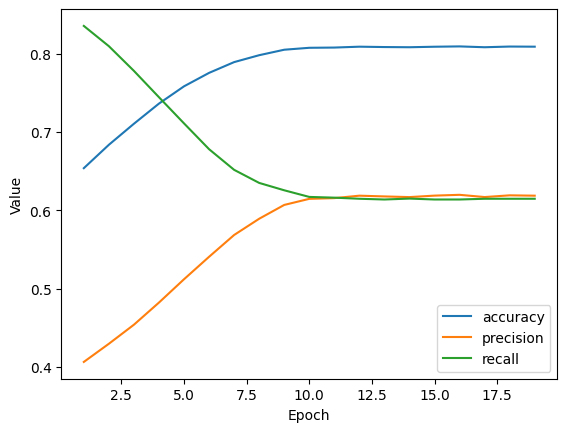

In [30]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "median_house_value_is_high"

# Modify the following definition of METRICS to generate
# not only accuracy and precision, but also recall:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name='recall')
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', 'precision', 'recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/20
170/170 [==============================] - 0s 869us/step - loss: 0.6221 - accuracy: 0.5818 - precision: 0.3622 - recall: 0.8860
Epoch 2/20
170/170 [==============================] - 0s 832us/step - loss: 0.5642 - accuracy: 0.6318 - precision: 0.3917 - recall: 0.8571
Epoch 3/20
170/170 [==============================] - 0s 795us/step - loss: 0.5159 - accuracy: 0.6752 - precision: 0.4232 - recall: 0.8262
Epoch 4/20
170/170 [==============================] - 0s 794us/step - loss: 0.4783 - accuracy: 0.7114 - precision: 0.4551 - recall: 0.7862
Epoch 5/20
170/170 [==============================] - 0s 787us/step - loss: 0.4483 - accuracy: 0.7400 - precision: 0.4867 - recall: 0.7433
Epoch 6/20
170/170 [==============================] - 0s 789us/step - loss: 0.4268 - accuracy: 0.7618 - precision: 0.5170 - recall: 0.7061
Epoch 7/20
170/170 [==============================] - 0s 795us/step - loss: 0.4123 - accuracy: 0.7805 - precision: 0.5492 - recall: 0.6781
Epoch 8/20
170/170 [=======

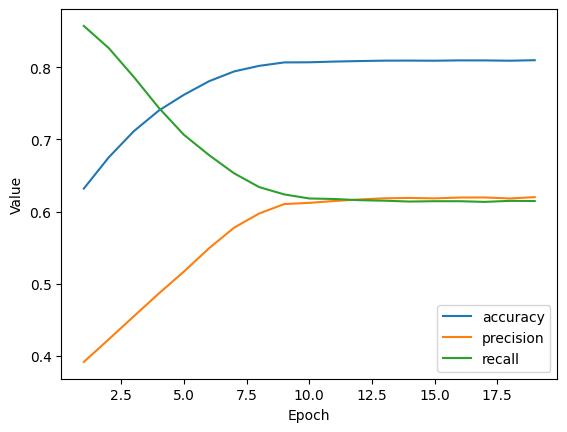

In [16]:
#@title Double-click to view the solution for Task 3.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are 
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

## Task 4: Experiment with the classification threshold (if time permits)

Experiment with different values for `classification_threshold` in the code cell within "Invoke the creating, training, and plotting functions."  What value of `classification_threshold` produces the highest accuracy?

## 任务 4：试验分类阈值（如果时间允许）

在“调用创建、训练和绘图函数”中的代码单元中试验“classification_threshold”的不同值。 “classification_threshold”的什么值会产生最高的精度？

Epoch 1/20
170/170 [==============================] - 0s 849us/step - loss: 1.0519 - accuracy: 0.3321 - precision: 0.0910 - recall: 0.1862
Epoch 2/20
170/170 [==============================] - 0s 814us/step - loss: 0.9454 - accuracy: 0.4042 - precision: 0.0797 - recall: 0.1314
Epoch 3/20
170/170 [==============================] - 0s 795us/step - loss: 0.8519 - accuracy: 0.5279 - precision: 0.0765 - recall: 0.0803
Epoch 4/20
170/170 [==============================] - 0s 798us/step - loss: 0.7704 - accuracy: 0.6669 - precision: 0.1014 - recall: 0.0424
Epoch 5/20
170/170 [==============================] - 0s 817us/step - loss: 0.7006 - accuracy: 0.7231 - precision: 0.1470 - recall: 0.0226
Epoch 6/20
170/170 [==============================] - 0s 838us/step - loss: 0.6420 - accuracy: 0.7377 - precision: 0.2006 - recall: 0.0167
Epoch 7/20
170/170 [==============================] - 0s 847us/step - loss: 0.5932 - accuracy: 0.7446 - precision: 0.2783 - recall: 0.0139
Epoch 8/20
170/170 [=======

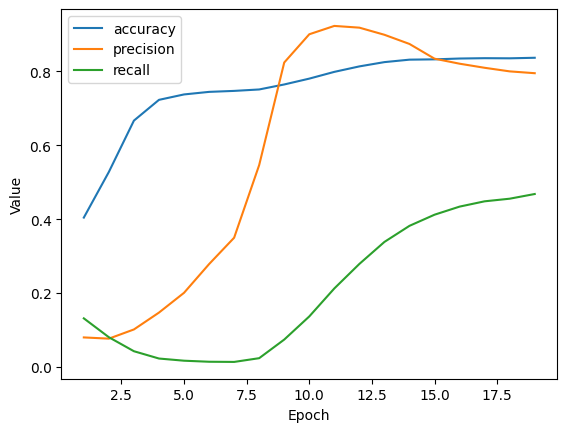

In [17]:
#@title Double-click to view the solution for Task 4.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.52
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops 
# accuracy by about 5%.  Lowering the 
# `classification_threshold` to 0.3 drops accuracy by 
# about 3%. 

## Task 5: Summarize model performance (if time permits)

If time permits, add one more metric that attempts to summarize the model's overall performance. 

## 任务 5：汇总模型性能（如果时间允许）

如果时间允许，请再添加一个指标，尝试汇总模型的整体性能。

Epoch 1/20
170/170 [==============================] - 0s 827us/step - loss: 0.7570 - auc: 0.5533
Epoch 2/20
170/170 [==============================] - 0s 893us/step - loss: 0.6758 - auc: 0.6352
Epoch 3/20
170/170 [==============================] - 0s 874us/step - loss: 0.6055 - auc: 0.7066
Epoch 4/20
170/170 [==============================] - 0s 909us/step - loss: 0.5477 - auc: 0.7568
Epoch 5/20
170/170 [==============================] - 0s 963us/step - loss: 0.5007 - auc: 0.7888
Epoch 6/20
170/170 [==============================] - 0s 851us/step - loss: 0.4649 - auc: 0.8087
Epoch 7/20
170/170 [==============================] - 0s 823us/step - loss: 0.4390 - auc: 0.8218
Epoch 8/20
170/170 [==============================] - 0s 820us/step - loss: 0.4214 - auc: 0.8296
Epoch 9/20
170/170 [==============================] - 0s 829us/step - loss: 0.4108 - auc: 0.8336
Epoch 10/20
170/170 [==============================] - 0s 881us/step - loss: 0.4044 - auc: 0.8353
Epoch 11/20
170/170 [========

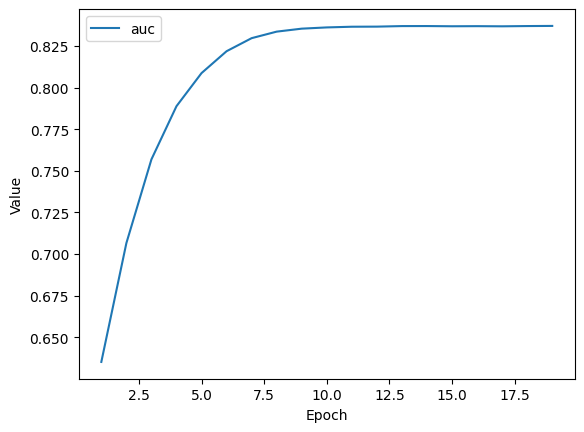

In [18]:
#@title Double-click to view the solution for Task 5.

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
label_name = "median_house_value_is_high"

# AUC is a reasonable "summary" metric for 
# classification models.
# Here is the updated definition of METRICS to 
# measure AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
my_model = create_model(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs, 
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['auc'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)